# Let's make a heatmap

First, we're going to need geographic data. Open Street Map is a fantastic repository of it, maintained by a community 
of volunteers and free to use. We'll use a python wrapper to the Overpass API.

In [54]:
%matplotlib inline
import overpass
api = overpass.API()

_TODO: intro overpass API_

Okay, let's get some data! In order to satiate my addiction to caffeine, I'm going to request all the coffeeshops in the city of Seattle. To make things easy I'm just going to hardcode the latitude and longitude into the text of the query; these can easily be found by clicking on a point of Google Maps, or if you're using Open Street Maps, by right-clicking and selecting Show Address. 

In [32]:
response = api.Get('node["amenity"="cafe"](47.5, -122.436, 47.734, -122.235);')
seattle_cafes = []
for feature in response['features']:
    if 'name' in feature['properties']:
        seattle_cafes.append((feature['properties']['name'], *feature['geometry']['coordinates']))

In [146]:
from pandas import DataFrame
df = DataFrame.from_records(sorted(seattle_cafes), columns=["name", "lon", "lat"])
df

,name,lon,lat
0,3.14 Bakery & Coffee,-122.354960,47.517178
1,3rd Ave Cafe,-122.339931,47.612024
2,701 Coffee,-122.302936,47.608155
3,72nd Street Café,-122.325448,47.680479
4,A Muddy Cup,-122.325240,47.661416
5,Ada's Technical Books and Cafe,-122.312893,47.622687
6,Admiral Bird Cafe,-122.386350,47.581056
7,Alison’s Coastal Cafe & Bakery,-122.382517,47.667274
8,All City Coffee,-122.317113,47.549020
9,Allegro Coffee,-122.376516,47.636961


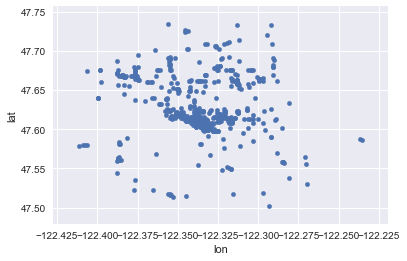

In [147]:
import matplotlib.pyplot as plt
df.plot.scatter(x='lon', y='lat')

With the scatterplot above, we've got a quick-and-dirty point-plotting that actually lets us see the waterfront around downtown Seattle in the center, which is kind of neat. 

_TODO: intro Folium, heatmaps_

In [159]:
import folium
from folium.plugins import HeatMap
hmap = folium.Map(location=[47.6, -122.35], zoom_start=12)
coords = [[item[1].lat, item[1].lon] for item in df.iterrows()]
hm_wide = HeatMap( coords, 
                   max_zoom=1,
                   min_opacity=0.2,
                   radius=10, blur=15, 
                 )
hmap.add_child(hm_wide)
hmap

_TODO: talk about some of the parameters we chose_

Now let's try a heatmap for the whole country. 

In [168]:
import json
lines = ""
with open('cafes_us_OSM.geojson', encoding='utf-8') as f:
    result = json.loads(f.read())

In [171]:
cafes = []
for feature in result['features']:
    if 'name' in feature['properties']:
        cafes.append((feature['properties']['name'], *feature['geometry']['coordinates']))
us_cafes = DataFrame.from_records(sorted(cafes), columns=["name", "lon", "lat"])
us_cafes

,name,lon,lat
0,&Grain,-74.330757,40.652768
1,(Defunct),-102.757721,33.725534
2,"(Vacant, formerly) The Wild Grape",-111.877233,40.769591
3,10 Below Ice Cream,-73.998514,40.713751
4,10 Johnson,-86.073093,39.770324
5,10-4 Cafe,-119.910486,46.258439
6,1000 grammes bistro glouton,-73.553876,45.521136
7,10eighteen cafe,-81.217237,42.993104
8,12 Corners,-73.997117,40.718056
9,1215 Wine Bar & Coffee Lab,-84.515079,39.108739


In [224]:
us_cafes['count'] = 1
us_cafes_counted = us_cafes.groupby("name")['count'].count().sort_values(ascending=False)
us_cafes_counted[:50]

name
Starbucks                     3768
Tim Hortons                    811
Dunkin' Donuts                 730
Starbucks Coffee               657
Dunkin Donuts                  204
Second Cup                     162
Caribou Coffee                 132
Peet's Coffee & Tea             81
Panera Bread                    80
Coffee Time                     74
Jamba Juice                     65
Starbuck's                      64
Subway                          62
Peet's Coffee                   49
Country Style                   48
Au Bon Pain                     33
Biggby Coffee                   31
Le Pain Quotidien               31
club house                      30
Tropical Smoothie Cafe          28
The Coffee Bean & Tea Leaf      27
Panera                          26
Cafeteria                       24
Cold Stone Creamery             23
Blenz Coffee                    23
Coffee Culture                  22
Baskin-Robbins                  21
Bruegger's Bagels               20
Tully's Coffee 

In [225]:
chains = us_cafes_counted.index[:50]
chains

Index(['Starbucks', 'Tim Hortons', 'Dunkin' Donuts', 'Starbucks Coffee',
       'Dunkin Donuts', 'Second Cup', 'Caribou Coffee', 'Peet's Coffee & Tea',
       'Panera Bread', 'Coffee Time', 'Jamba Juice', 'Starbuck's', 'Subway',
       'Peet's Coffee', 'Country Style', 'Au Bon Pain', 'Biggby Coffee',
       'Le Pain Quotidien', 'club house', 'Tropical Smoothie Cafe',
       'The Coffee Bean & Tea Leaf', 'Panera', 'Cafeteria',
       'Cold Stone Creamery', 'Blenz Coffee', 'Coffee Culture',
       'Baskin-Robbins', 'Bruegger's Bagels', 'Tully's Coffee',
       'Coffee Bean & Tea Leaf', 'Einstein Bros Bagels', 'Bridgehead',
       'Peet's', 'Cosi', 'Einstein Bros. Bagels', 'Timothy's World Coffee',
       'Peet's Coffee and Tea', 'Van Houtte', 'Dutch Bros', 'Presse Café',
       'Corner Bakery Cafe', 'Philz Coffee', 'Tim Horton's', 'Tim Horton',
       'Timothy's', 'Corner Bakery', 'Aroma Espresso Bar',
       'Café Starbucks Coffee', 'Top Pot Doughnuts', 'Club House'],
      dtype='objec

In [226]:
len(us_cafes[us_cafes.name.isin(chains)])

7662

In [227]:
len(us_cafes[~us_cafes.name.isin(chains)])

12510

Looks like we don't have nearly complete data, as sources that I'm able to easily find put the number at about three times that (see References section). Still, should be good enough for our purposes.

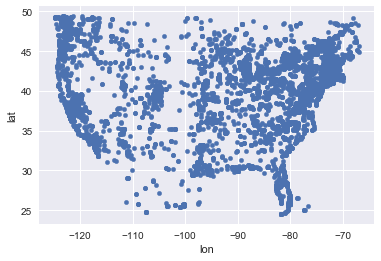

In [198]:
us_cafes.plot.scatter(x='lon', y='lat')

In [234]:
hmap = folium.Map(location=[35, -90], zoom_start=4)
coords = [[item[1].lat, item[1].lon] for item in us_cafes[~us_cafes.name.isin(chains)].iterrows()]
hm_wide = HeatMap( coords, 
                   max_zoom=1,
                   min_opacity=0.1,
                   radius=5, blur=10, 
                 )
hmap.add_child(hm_wide)
hmap

### References
Heatmaps with Folium in Python: https://alcidanalytics.com/p/geographic-heatmap-in-python
Number of Starbucks in the US: https://www.statista.com/statistics/218360/number-of-starbucks-stores-in-the-us/